In [1]:
import lightgbm as lgb


import pandas as pd
import os
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import (
    confusion_matrix,
    roc_curve,
    auc,
    precision_recall_curve,
    roc_auc_score,
)
from sklearn.metrics import (
    precision_recall_fscore_support,
    precision_score,
    recall_score,
    f1_score,
    accuracy_score,
    average_precision_score,
    plot_confusion_matrix,
)
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from collections import Counter
from plotly import graph_objects as go
from sklearn.metrics import precision_recall_curve
from numpy import argmax
from sklearn.calibration import calibration_curve
from sklearn.calibration import CalibrationDisplay
from sklearn.metrics import ConfusionMatrixDisplay



import numpy as np

import warnings


from sklearn.metrics import f1_score


def lgb_f1_score(y_hat, data):
    y_true = data.get_label()
    y_hat = np.round(y_hat)  # scikits f1 doesn't like probabilities
    return "f1", f1_score(y_true, y_hat), True


warnings.simplefilter("ignore")


TARGET = "target"

CONTINUOUS_FEATURES = [
    "CNT_CHILDREN",
    "AMT_INCOME_TOTAL",
    "DAYS_BIRTH",
    "DAYS_EMPLOYED",
    "CNT_FAM_MEMBERS",
]


BASE_INPUT = "./data/"


train_df = pd.read_csv(os.path.join(BASE_INPUT, "train.csv"))
val_df = pd.read_csv(os.path.join(BASE_INPUT, "val.csv"))
test_df = pd.read_csv(os.path.join(BASE_INPUT, "test.csv"))


train_labels = np.array(train_df.pop(TARGET))
val_labels = np.array(val_df.pop(TARGET))
test_labels = np.array(test_df.pop(TARGET))


# train_labels = np.array(train_df[TARGET])
# val_labels = np.array(val_df[TARGET])
# test_labels = np.array(test_df[TARGET])


_ = train_df.pop("ID"), val_df.pop("ID"), test_df.pop("ID")

In [29]:
scale_pos_weight = 100 - (378 / (378 + 22954) * 100)


dtrain = lgb.Dataset(data=train_df, label=train_labels)
dval = lgb.Dataset(data=val_df, label=val_labels)
dtest = lgb.Dataset(data=test_df, label=test_labels)


params = {
    "random_state": 10,
    "objective": "binary",
    "num_leaves": 200,
    "min_sum_hessian_in_leaf": 5,
    "scale_pos_weight": 50,
    "boost_from_average": False,
    "min_gain_to_split": 0.001,
    "min_data_in_leaf": 5,
    "max_depth": 7,
    "max_bin": 250,
    "learning_rate": 0.1,
    "lambda_l2": 0.1,
    "lambda_l1": 0.1,
    "feature_fraction": 0.95,
    "subsample": 0.95,
    "boosting": "gbdt",
    "bagging_freq": 2,
    "bagging_fraction": 0.75,
}


model = lgb.train(
    params,
    dtrain,
    valid_sets=[dval, dtrain, dtest],
    num_boost_round=500,
    valid_names=["val", "train", "test"],
    feval=lgb_f1_score,
    early_stopping_rounds=50,
)
dtrain

[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.95 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.95 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Info] Number of positive: 275, number of negative: 5950
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001102 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 680
[LightGBM] [Info] Number of data points in the train set: 6225, number of used features: 52
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.95 will be ignored. Current value: bagging_fraction=0.75
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Warning] bagging_fraction is set=0.75, subsample=0.95 will be ignored. Current value: bagging_fraction=0.75
[L

[35]	train's binary_logloss: 0.574455	train's f1: 0.222312	val's binary_logloss: 0.631009	val's f1: 0.115445	test's binary_logloss: 0.623381	test's f1: 0.10687
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[36]	train's binary_logloss: 0.565705	train's f1: 0.225422	val's binary_logloss: 0.623876	val's f1: 0.117089	test's binary_logloss: 0.61568	test's f1: 0.111688
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[37]	train's binary_logloss: 0.552153	train's f1: 0.236105	val's binary_logloss: 0.610803	val's f1: 0.111293	test's binary_logloss: 0.602859	test's f1: 0.109772
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[38]	train's binary_logloss: 0.541867	train's f1: 0.244316	val's binary_logloss: 0.601472	val's f1: 0.114094	test's binary_logloss: 0.593725	test's f1: 0.114846
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[39]	train's binary_logloss: 0.534164	train's f1: 0.246736

[74]	train's binary_logloss: 0.363121	train's f1: 0.381944	val's binary_logloss: 0.464395	val's f1: 0.0981912	test's binary_logloss: 0.451883	test's f1: 0.131291
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[75]	train's binary_logloss: 0.35908	train's f1: 0.388967	val's binary_logloss: 0.460886	val's f1: 0.0949868	test's binary_logloss: 0.449174	test's f1: 0.132159
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[76]	train's binary_logloss: 0.352451	train's f1: 0.397399	val's binary_logloss: 0.456244	val's f1: 0.097035	test's binary_logloss: 0.443402	test's f1: 0.125843
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[77]	train's binary_logloss: 0.348709	train's f1: 0.399709	val's binary_logloss: 0.453855	val's f1: 0.0923913	test's binary_logloss: 0.439329	test's f1: 0.127854
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[78]	train's binary_logloss: 0.346452	train's f1: 0.40

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

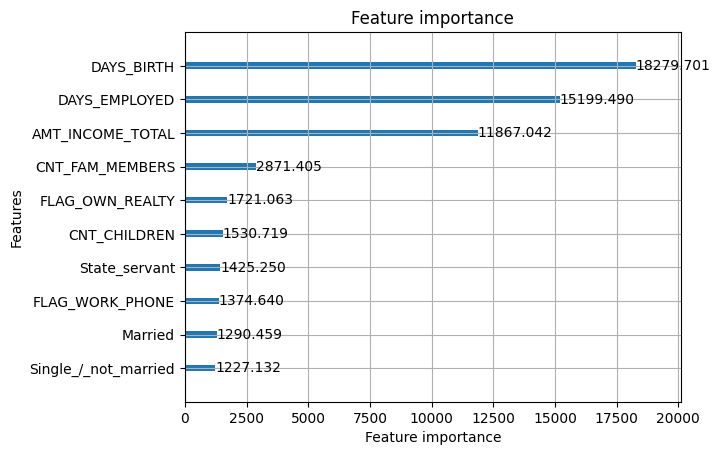

In [30]:
lgb.plot_importance(model, max_num_features=10, importance_type="gain")

<AxesSubplot: title={'center': 'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

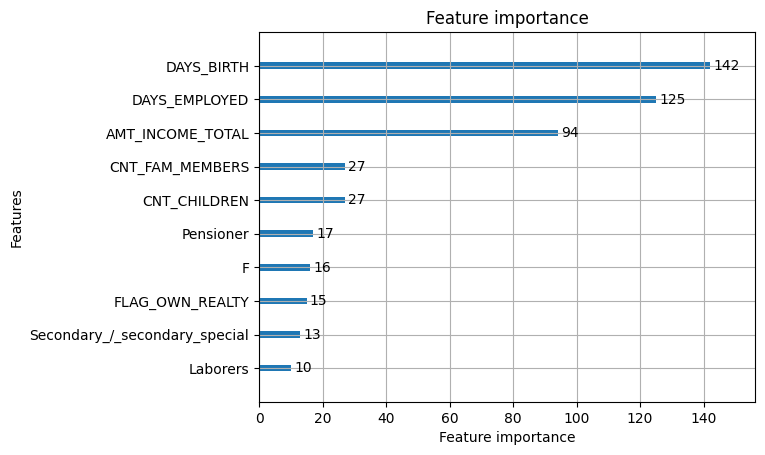

In [4]:
lgb.plot_importance(model, max_num_features=10, importance_type="split")

In [5]:
def evaluate(model, testing_set_x, testing_set_y, phase):

    predictions = model.predict(testing_set_x)

    precision, recall, thresholds = precision_recall_curve(testing_set_y, predictions)

    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = argmax(fscore)
    print(f"Best Threshold={thresholds[ix]}, F-Score : {fscore[ix]}")

    bst_threshold = thresholds[ix]

    accuracy = accuracy_score(testing_set_y, predictions >= bst_threshold)
    roc_auc = roc_auc_score(testing_set_y, predictions)
    precision = precision_score(testing_set_y, predictions >= bst_threshold)
    recall = recall_score(testing_set_y, predictions >= bst_threshold)
    pr_auc = average_precision_score(testing_set_y, predictions)
    precision_curv, recall_curv, thresholds = precision_recall_curve(
        testing_set_y, predictions
    )
    fig = go.Figure(data=[go.Line(x=recall_curv, y=precision_curv)])
    fig.update_layout(
        title=f"{phase} - Precision-Recall Curve",
        xaxis_title="Recall",
        yaxis_title="Precesion",
        legend_title="Legend Title",
        font=dict(family="Courier New, monospace", size=18, color="RebeccaPurple"),
    )

    fig.show()
    print(f"---  {phase} ----")
    result = pd.DataFrame(
        [[accuracy, precision, recall, roc_auc, pr_auc]],
        columns=["Accuracy", "Precision", "Recall", "ROC_auc", "PR_auc"],
    )
    return result

In [23]:
evaluate(model,test_df,test_labels,'TEST STATS')

Best Threshold=0.7280192905561168, F-Score : 0.16216216216216217


plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.



---  TEST STATS ----


,Accuracy,Precision,Recall,ROC_auc,PR_auc
0,0.888489,0.122807,0.238636,0.640847,0.105659


In [7]:
evaluate(model,train_df,train_labels, 'TRAIN STATS')

Best Threshold=0.4544399698366264, F-Score : 0.5561497326203207


C:\Users\errab\miniconda3\envs\microsoft-clever-metrics\lib\site-packages\plotly\graph_objs\_deprecations.py:378: DeprecationWarning:

plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.




---  TRAIN STATS ----


,Accuracy,Precision,Recall,ROC_auc,PR_auc
0,0.96,0.545455,0.567273,0.933382,0.594087


Best Threshold=0.4544399698366264, F-Score : 0.5561497326203207


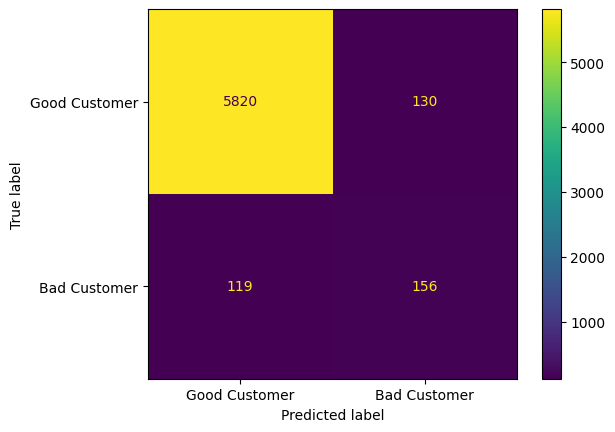

In [8]:


def plot_confusion_matrix(labels, df, phase):
    # calculate pr curve
    preds = model.predict(df)
    precision, recall, thresholds = precision_recall_curve(labels, preds)

    # convert to f score
    fscore = (2 * precision * recall) / (precision + recall)
    # locate the index of the largest f score
    ix = argmax(fscore)
    print(f"Best Threshold={thresholds[ix]}, F-Score : {fscore[ix]}")

    bst_threshold = thresholds[ix]

    cm = confusion_matrix(labels, preds >= bst_threshold)

    cm_display = ConfusionMatrixDisplay(
        confusion_matrix=cm, display_labels=["Good Customer", "Bad Customer"]
    )

    cm_display.plot()
    plt.show()


plot_confusion_matrix(train_labels, train_df, "---TRAIN --")

Best Threshold=0.7684093727512775, F-Score : 0.14388489208633096


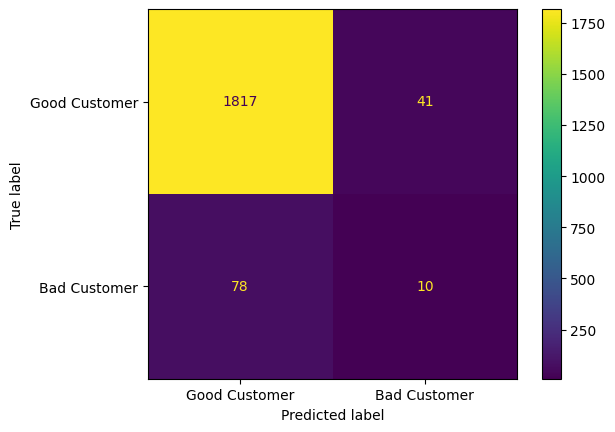

In [31]:
plot_confusion_matrix(test_labels,test_df,"---TEST --")

In [10]:
import shap
explainer   = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_df)


In [11]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(train_df)

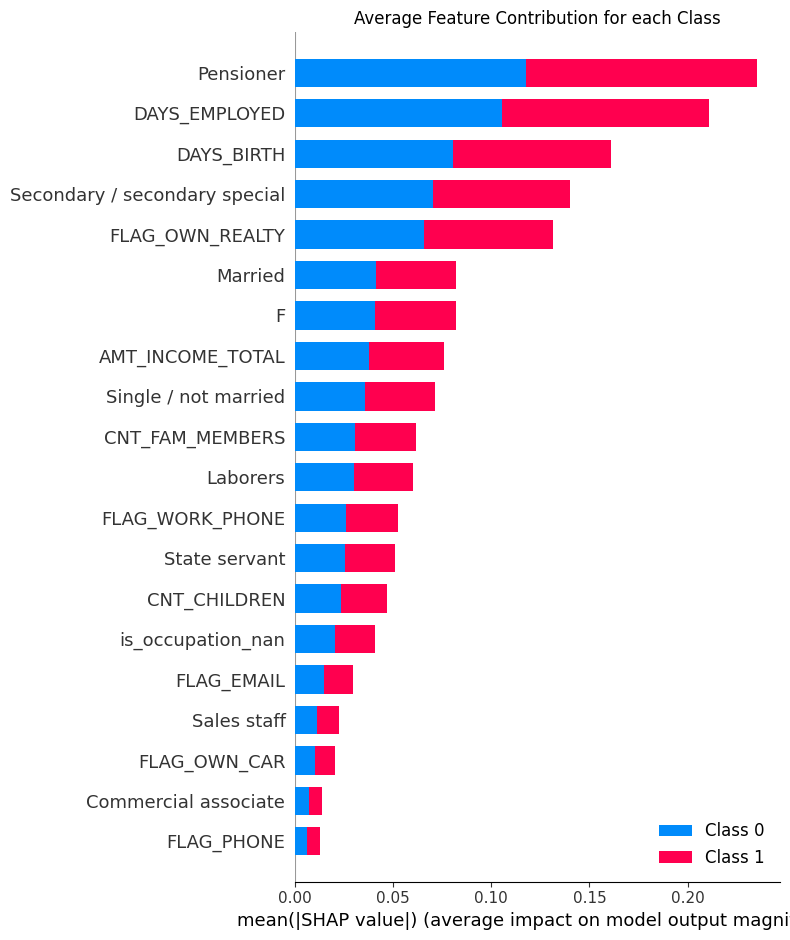

In [12]:
plt.title('Average Feature Contribution for each Class')
shap.summary_plot(shap_values, train_df, plot_type="bar")

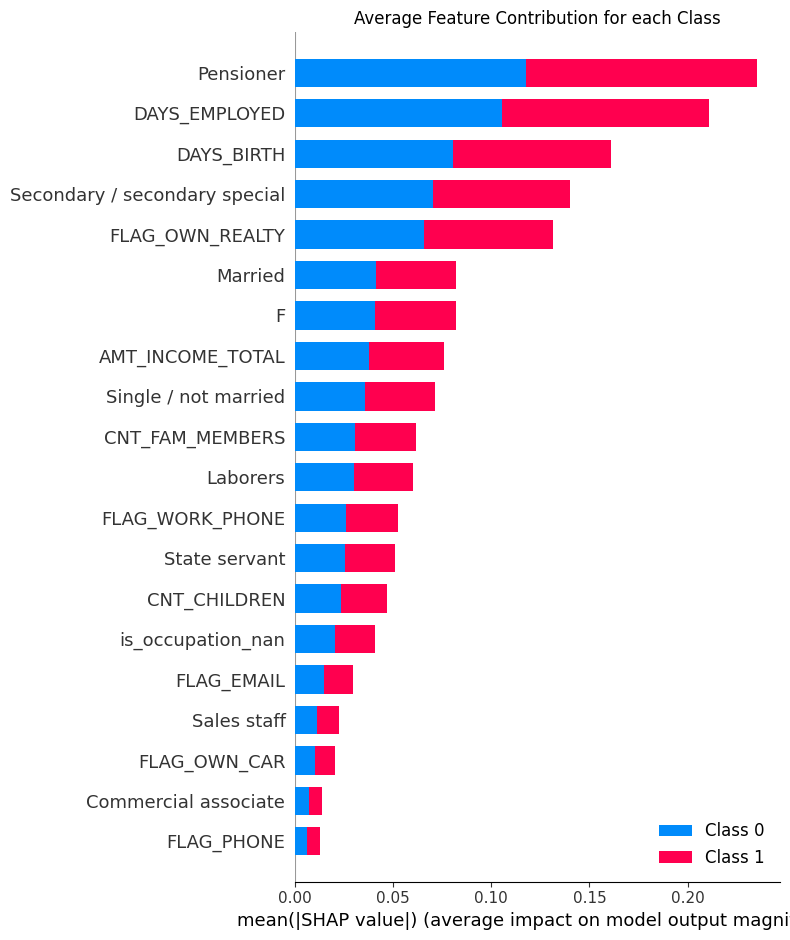

In [13]:
plt.title('Average Feature Contribution for each Class')
shap.summary_plot(shap_values, test_df, plot_type="bar")

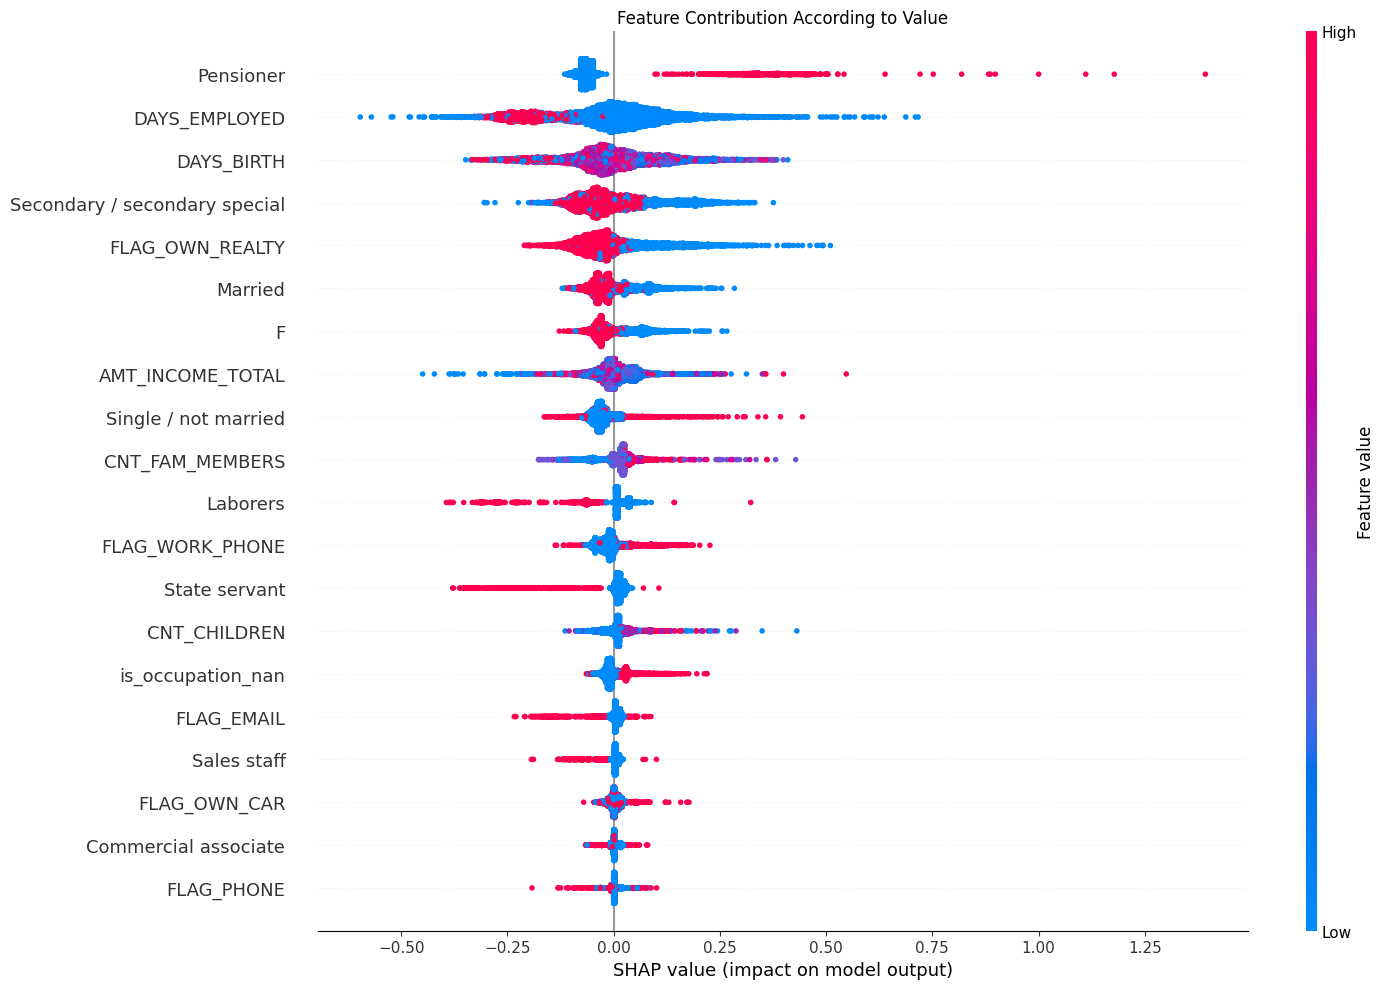

In [14]:
plt.title('Feature Contribution According to Value')
shap.summary_plot(shap_values[1], train_df, plot_size = (15,10))

## Responsible AI

In [15]:
test_df_with_target = test_df.copy()
test_df_with_target["target"] = test_labels
test_M = test_df_with_target[test_df_with_target.M == 1]
test_F = test_df_with_target[test_df_with_target.F == 1]

test_M_labels = test_M.pop("target")
test_F_labels = test_F.pop("target")

In [16]:
evaluate(model, test_M, test_M_labels, "TEST STATS - Gender M")

Best Threshold=0.6596717974093675, F-Score : nan


plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.



---  TEST STATS - Gender M ----


,Accuracy,Precision,Recall,ROC_auc,PR_auc
0,0.93816,0.0,0.0,0.588283,0.131621


In [17]:
evaluate(model, test_F, test_F_labels, "TEST STATS - Gender F")

Best Threshold=0.6842994409367447, F-Score : nan


plotly.graph_objs.Line is deprecated.
Please replace it with one of the following more specific types
  - plotly.graph_objs.scatter.Line
  - plotly.graph_objs.layout.shape.Line
  - etc.



---  TEST STATS - Gender F ----


,Accuracy,Precision,Recall,ROC_auc,PR_auc
0,0.961808,0.0,0.0,0.56665,0.076706


--- PHASE : TEST ---


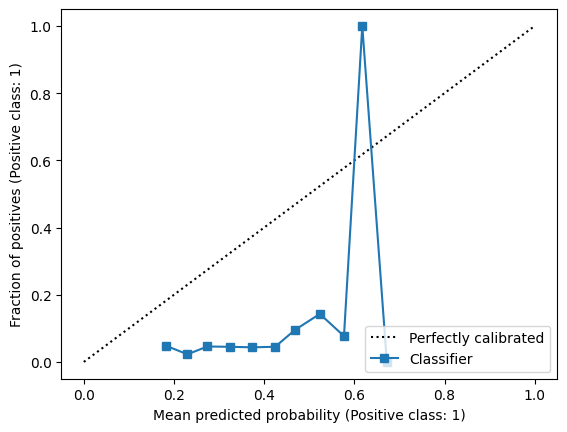

In [18]:
def plot_calibration_curve(df, labels, phase=""):

    predictions = model.predict(df)
    ds = CalibrationDisplay.from_predictions(labels, predictions, n_bins=20)

    #     plt.plot([0, 1], [0, 1], linestyle='--')

    #     plt.plot(gb_x, gb_y, marker='.')
    print(f"--- PHASE : {phase} ---")
    plt.show()


plot_calibration_curve(test_df, test_labels, "TEST")

--- PHASE : TRAIN ---


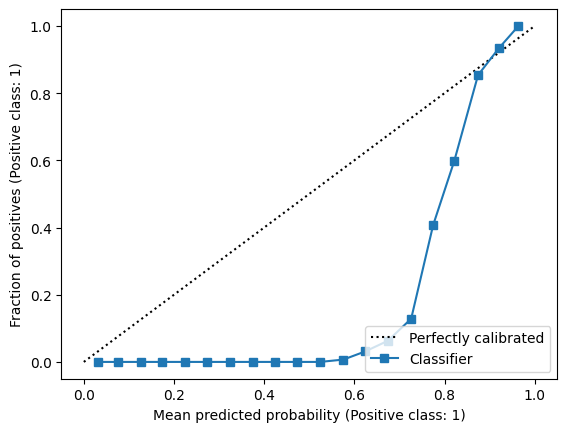

In [32]:
plot_calibration_curve(train_df, train_labels, "TRAIN")